# Analise de Distribuição

In [9]:
#Importando as bibliotecas nescessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
#Carregando o banco de dados
df = pd.read_csv('C:\\Prog\\Py\\ProjetosPessoais\\Pratica_e_pesquisa\\NESFIT\\data\\fitness_gym.csv')

In [3]:
#Exibindo amostra dos dados
df.sample(10)

,check_in_id,date,time,member_id,age,gender,membership_type,activity,duration_minutes,calories_burned,activity_category,attendance_streak,satisfaction_score,cancelled,cancellation_reason
132,CHECK_0133,2023-09-05,11:42:00,MEMBER_0028,35,M,Premium,Musculação,60,342,Força,19,4,False,NaN
92,CHECK_0093,2023-06-21,17:11:00,MEMBER_0064,41,M,Basic,Musculação,86,491,Força,16,4,False,NaN
199,CHECK_0199,2023-12-30,20:38:00,MEMBER_0038,46,F,VIP,Jump,49,391,Cardio,19,5,False,NaN
196,CHECK_0197,2023-12-27,11:47:00,MEMBER_0024,55,M,VIP,Zumba,63,360,Dança,17,4,False,NaN
169,CHECK_0171,2023-11-04,06:03:00,MEMBER_0074,30,M,Premium,Boxing,61,457,Luta,14,4,False,NaN
43,CHECK_0044,2023-03-30,18:09:00,MEMBER_0073,28,M,Basic,Boxing,75,562,Luta,4,4,False,NaN
44,CHECK_0045,2023-04-01,20:19:00,MEMBER_0013,20,M,Basic,Spinning,40,488,Cardio,9,4,False,NaN
144,CHECK_0145,2023-09-26,12:33:00,MEMBER_0047,55,F,Basic,Musculação,87,402,Força,10,3,False,NaN
2,CHECK_0003,2023-01-04,07:54:00,MEMBER_0072,36,M,Premium,Musculação,73,417,Força,16,5,False,NaN
46,CHECK_0047,2023-04-10,06:23:00,MEMBER_0006,24,F,Basic,Yoga,56,221,Bem-estar,10,4,False,NaN


In [4]:
#informações sobre o banco de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   check_in_id          200 non-null    object
 1   date                 200 non-null    object
 2   time                 200 non-null    object
 3   member_id            200 non-null    object
 4   age                  200 non-null    int64 
 5   gender               200 non-null    object
 6   membership_type      200 non-null    object
 7   activity             200 non-null    object
 8   duration_minutes     200 non-null    int64 
 9   calories_burned      200 non-null    int64 
 10  activity_category    200 non-null    object
 11  attendance_streak    200 non-null    int64 
 12  satisfaction_score   200 non-null    int64 
 13  cancelled            200 non-null    bool  
 14  cancellation_reason  20 non-null     object
dtypes: bool(1), int64(5), object(9)
memory usage: 22.2+ KB


In [5]:
#Descrição superficial dos dados
df.describe()

,age,duration_minutes,calories_burned,attendance_streak,satisfaction_score
count,200.000000,200.000000,200.000000,200.000000,200.00000
mean,42.485000,56.720000,356.055000,13.340000,4.04500
std,13.730711,13.061955,149.449381,6.031275,0.58711
min,18.000000,24.000000,106.000000,1.000000,3.00000
25%,30.000000,47.000000,245.750000,9.000000,4.00000
50%,42.000000,57.000000,328.000000,13.000000,4.00000
75%,56.000000,64.000000,442.000000,18.000000,4.00000
max,64.000000,94.000000,910.000000,28.000000,5.00000


### Acima notamos:

Tempo médio de treino:  1 hora

Média de calórias queimadas por treino: 356 calorias

Média das idade: 42 anos

Idade mínima encontrada: 18 anos

Idade Máxima  encontrada: 64 anos

*********************************

### Gráfico de distribuição das atividades na academia

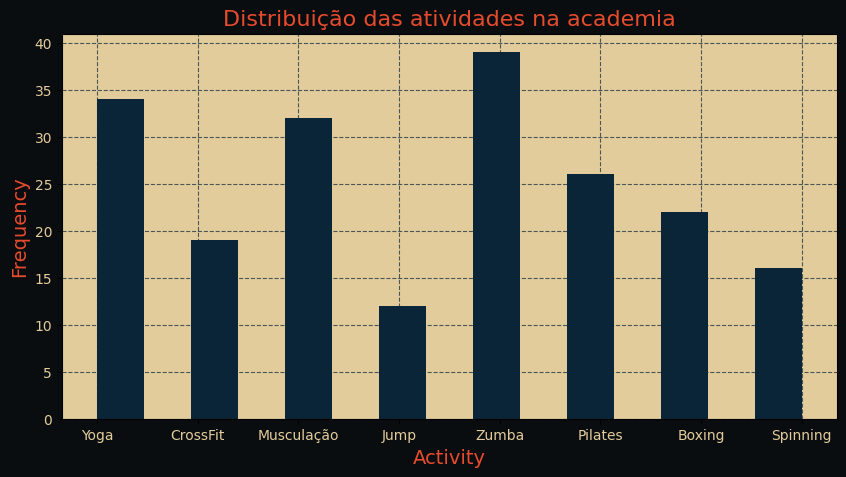

In [ ]:
#Seleciona a coluna activity do dataframe df, que contém informações sobre os tipos de atividades praticadas na academia.
activity = df['activity']

#Configura o tamanho da figura e define uma cor para a área externa da figura.
plt.figure(figsize=(10,5), facecolor = '#0A0D0F')

#Criando um histograma com as atividades praticadas na academia.
plt.hist(activity,color='#0A2538',bins=15)

#Alterando a cor de fundo do gráfico.
plt.gca().set_facecolor('#E2CC9C')


#Adiciona e personaliza a grade do gráfico.
plt.grid(True,color = '#0A2538', linestyle = "--", alpha = 0.7)

#Adicionando um título ao gráfico, define a cor do título e o tamanho do título.
plt.title('Distribuição das atividades na academia', fontsize=16, color='#E64B2D')

#Labels e ticks.
plt.xlabel('Atividades', fontsize=14, color='#E64B2D')
plt.ylabel('Frequência', fontsize=14, color='#E64B2D')
plt.xticks(color ='#E2CC9C',fontsize=10)
plt.yticks(color ='#E2CC9C',fontsize=10)

#Apresenta o gráfico.
plt.show()  




[]

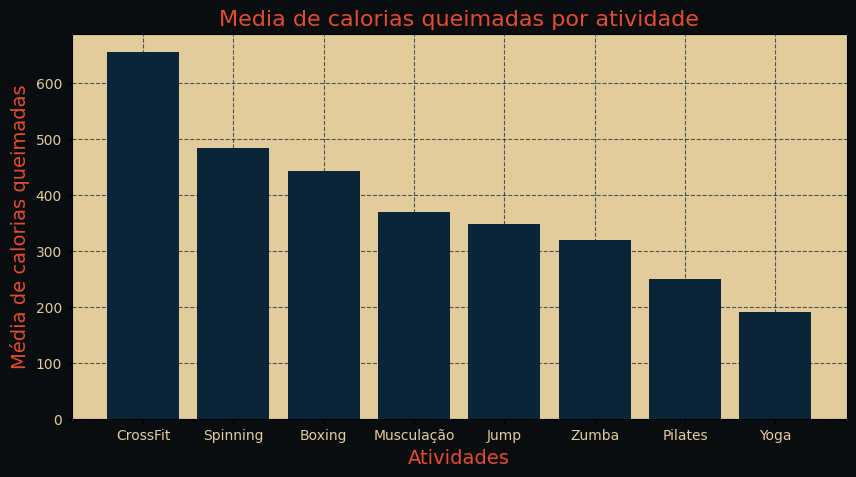

In [ ]:

#Agrupa a coluna activity com uma coluna formada pela média de calorias queimadas em cada atividade
calorias_atividade = df.groupby('activity')['calories_burned'].mean().reset_index()

#Ordena a coluna pela média de calorias queimadas em ordem decrescente
calorias_atividade.sort_values(by='calories_burned', ascending=False, inplace=True)

#Configura o tamanho da figura e define uma cor para a área externa da figura.
plt.figure(figsize=(10,5), facecolor = '#0A0D0F')
#Cria um gráfico de barras com a média de calorias queimadas por atividade na academia.
plt.bar(x=  calorias_atividade['activity'], height = calorias_atividade['calories_burned'],color = '#0A2538')

#Alterando a cor de fundo do gráfico.
plt.gca().set_facecolor('#E2CC9C')

#Adicionando e estilizando a grade
plt.grid(True,color = '#0A2538', linestyle = "--", alpha = 0.7)

#Adicionando um título ao gráfico, define a cor do título e o tamanho do título.
plt.title('Media de calorias queimadas por atividade', fontsize=16, color='#E64B2D')

#Labels e ticks.
plt.xlabel('Atividades', fontsize=14, color='#E64B2D')
plt.ylabel('Média de calorias queimadas', fontsize=14, color='#E64B2D')
plt.xticks(color ='#E2CC9C',fontsize=10)
plt.yticks(color ='#E2CC9C',fontsize=10)

#Mostra o gráfico.
plt.plot()


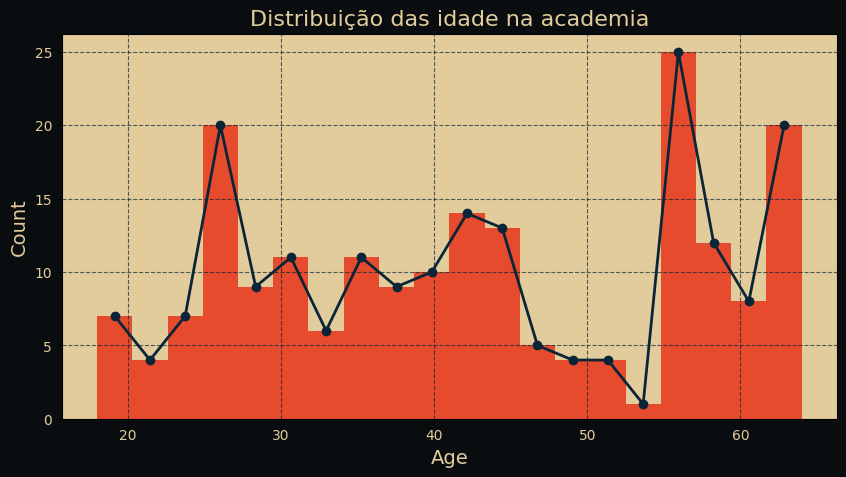

In [7]:

#Pegando as idades
ages = df['age']


#Configura o tamanho da figura e define uma cor para a área externa da figura.
plt.figure(figsize=(10,5), facecolor='#0A0D0F')

#Criando um histograma com as idades
plt.hist(ages,bins=20,color='#E64B2D')

#Alterando a cor de fundo do gráfico.
plt.gca().set_facecolor('#E2CC9C')

#Adicionando e estilizando a grade
plt.grid(True,color='#0A2538',alpha = 0.7, linestyle='--')

#Adicionando um título ao gráfico, define a cor do título e o tamanho do título.
plt.title('Distribuição das idade na academia', color='#E2CC9C',fontsize=16)

#Labels e ticks.
plt.xlabel('Age',color='#E2CC9C',fontsize=14)
plt.ylabel('Count',color='#E2CC9C',fontsize=14)
plt.xticks(color ='#E2CC9C',fontsize=10)
plt.yticks(color ='#E2CC9C',fontsize=10)



#Criando um gráfico em linha
age_counts, bin_edges = np.histogram(ages, bins=20)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
plt.plot(bin_centers, age_counts, color='#0A2538', marker='o', linestyle='-', linewidth=2, label='Linha')
plt.show()